In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
#sc.logging.print_versions() 
sc.logging.print_header()
sc.settings.verbosity = 3  
sc.settings.set_figure_params(dpi=120, color_map='viridis')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.0 scipy==1.9.0 pandas==1.4.3 scikit-learn==0.24.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [2]:
adata = sc.read('/home/jovyan/mounting_point/renal_covid_19_gex_myeloid_soupX_QC_orig.ident_annotated_levle23.h5ad',cache=True) #annotated data

In [3]:
adata

AnnData object with n_obs × n_vars = 126622 × 1215
    obs: 'annotation22_ES', 'centre', 'sample_id', 'sample_id_broad', 'sample_date', 'sample_date_yr', 'pool', 'pool_broad', 'haniffa_broad_predLabel', 'orig.ident', 'merged_souporcell_cluster', 'merged_souporcell_status', 'patient_id', 'case_control', 'WHO_severity', 'sex', 'calc_age', 'discharge_date', 'date_positive_swab', 'date_first_symptoms', 'admission_date', 'ethnicity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.8', '5_subcluster', '9_subcluster', 'annotation', 'annotation23_ES', 'annotation24_ES', 'annot3', 'annot2', 'annot1', 'leiden_0.5', 'annot4'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '5_subcluster_colors', '9_subcluster', '9_subcluster_colors', 'WHO_severity_colors', 'X_pca_harmony_orig.ident', 'annot1_colors', 'annot2_colors', 'annot3_colors', '

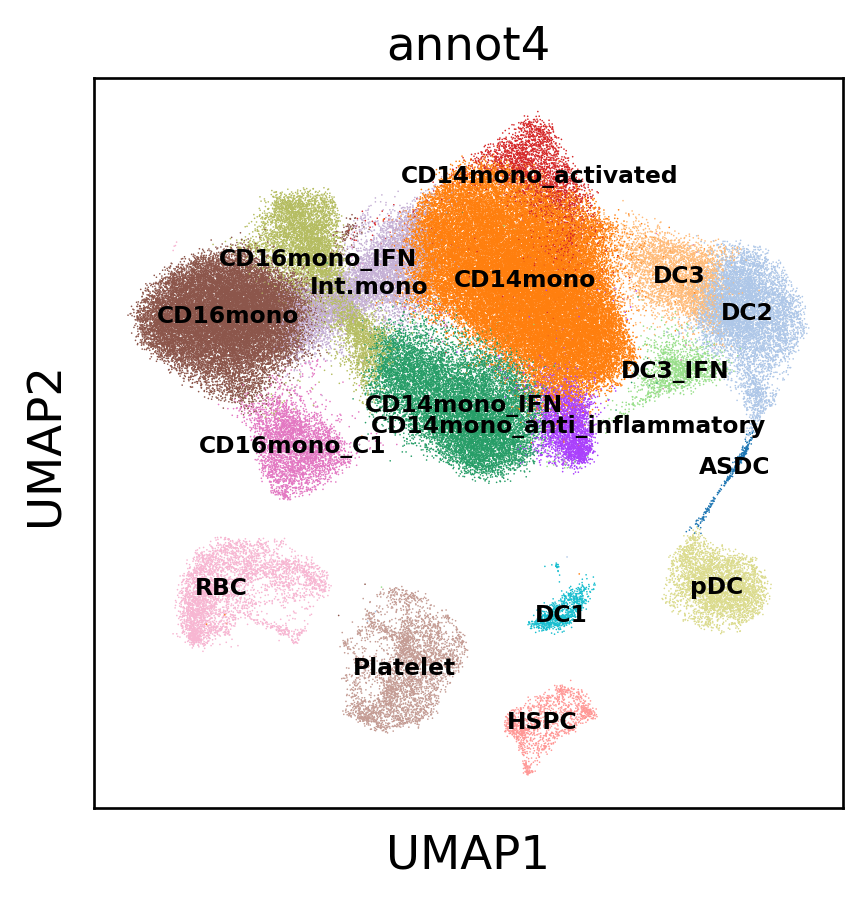

In [4]:
sc.pl.umap(adata,neighbors_key='X_pca_harmony_orig.ident',color=['annot4'], legend_fontsize = 7,legend_loc='on data')

In [5]:
list(adata.obs['annot4'].unique())

['CD14mono_activated',
 'CD16mono',
 'pDC',
 'CD14mono',
 'Int.mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'CD14mono_IFN',
 'RBC',
 'DC2',
 'Platelet',
 'CD14mono_anti_inflammatory',
 'HSPC',
 'DC3',
 'DC1',
 'DC3_IFN',
 'ASDC']

In [6]:
'C139' in list(adata.obs['sample_id_broad'].unique())

False

In [7]:
'C116' in list(adata.obs['sample_id_broad'].unique())

False

In [8]:
'C141' in list(adata.obs['sample_id_broad'].unique())

True

In [9]:
#remove C141 from the samples
adata = adata[~adata.obs['sample_id_broad'].isin(['C141'])]

In [10]:
'C141' in list(adata.obs['sample_id_broad'].unique())

False

In [11]:
#get monocyte only
monocyte = adata[adata.obs['annot4'].isin(['CD14mono_activated','CD16mono','CD14mono','Int.mono','CD16mono_C1','CD16mono_IFN','CD14mono_IFN','CD14mono_anti_inflammatory'])]

In [12]:
list(monocyte.obs['annot4'].unique())

['CD14mono_activated',
 'CD16mono',
 'CD14mono',
 'Int.mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'CD14mono_IFN',
 'CD14mono_anti_inflammatory']

# adding t and b

In [13]:
#loading file from Rik's model ouput
adata_gex=sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_gex.h5ad')

In [14]:
adata_gex.obs['case_control'].unique()

['POSITIVE', 'NA', 'NEGATIVE', 'RECOVERY']
Categories (4, object): ['NA', 'NEGATIVE', 'POSITIVE', 'RECOVERY']

In [15]:
adata_gex = adata_gex[adata_gex.obs['case_control']!='NA']

In [16]:
adata_gex.obs['case_control'].unique()

['POSITIVE', 'NEGATIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [17]:
adata_gex.obs['wave_case_control']='nan'
adata_gex.obs.loc[(adata_gex.obs["centre"]=='NCL') &(adata_gex.obs["case_control"]=='POSITIVE'), "wave_case_control"] = 'wave1_positive'
adata_gex.obs.loc[(adata_gex.obs["centre"]=='NCL') &(adata_gex.obs["case_control"]=='NEGATIVE'), "wave_case_control"] = 'wave1_negative'
adata_gex.obs.loc[(adata_gex.obs["centre"]=='NCL') &(adata_gex.obs["case_control"]=='RECOVERY'), "wave_case_control"] = 'wave1_recovery'

adata_gex.obs.loc[(adata_gex.obs["centre"]=='Cambridge') &(adata_gex.obs["case_control"]=='POSITIVE'), "wave_case_control"] = 'wave2_positive'
adata_gex.obs.loc[(adata_gex.obs["centre"]=='Cambridge') &(adata_gex.obs["case_control"]=='NEGATIVE'), "wave_case_control"] = 'wave2_negative'
adata_gex.obs.loc[(adata_gex.obs["centre"]=='Cambridge') &(adata_gex.obs["case_control"]=='RECOVERY'), "wave_case_control"] = 'wave2_recovery'

/tmp/ipykernel_152/1305752060.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_gex.obs['wave_case_control']='nan'


In [18]:
list(adata_gex.obs['wave_case_control'].unique()) #wave 1 doesn't have recovery samples

['wave1_positive',
 'wave1_negative',
 'wave2_positive',
 'wave2_negative',
 'wave2_recovery']

In [19]:
adata_gex.obs['annot_to_plot']='non_monocyte'


In [20]:
adata_gex.obs['annot_to_plot'].update(pd.Series(monocyte.obs['annot4'].astype('object')))

In [21]:
adata_gex.obs['annot_to_plot'].unique()

array(['non_monocyte', 'CD14mono_activated', 'CD16mono', 'CD14mono',
       'Int.mono', 'CD16mono_IFN', 'CD14mono_IFN', 'CD16mono_C1',
       'CD14mono_anti_inflammatory'], dtype=object)

In [22]:
df_adata_gex = pd.crosstab(adata_gex.obs['wave_case_control'],adata_gex.obs['annot_to_plot'])
df_adata_gex

annot_to_plot,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,non_monocyte
wave_case_control,,,,,,,,,
wave1_negative,11735,656,1416,140,6638,461,621,2082,134207
wave1_positive,9561,3474,786,458,4689,1104,1792,982,260683
wave2_negative,2545,57,94,7,2065,84,79,433,29487
wave2_positive,14547,6499,358,1888,4717,1272,3159,1775,176512
wave2_recovery,2763,128,78,11,2328,95,102,503,38120


In [23]:
df_adata_gex['wave_case_control'] = df_adata_gex.index

In [24]:
df_adata_gex

annot_to_plot,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,non_monocyte,wave_case_control
wave_case_control,,,,,,,,,,
wave1_negative,11735,656,1416,140,6638,461,621,2082,134207,wave1_negative
wave1_positive,9561,3474,786,458,4689,1104,1792,982,260683,wave1_positive
wave2_negative,2545,57,94,7,2065,84,79,433,29487,wave2_negative
wave2_positive,14547,6499,358,1888,4717,1272,3159,1775,176512,wave2_positive
wave2_recovery,2763,128,78,11,2328,95,102,503,38120,wave2_recovery


#method 1

In [25]:
df_to_plot1= df_adata_gex.copy()

In [26]:
#getting percentage
cols = list(df_to_plot1.columns)
cols = cols[:-1]
df_to_plot1[cols] = df_to_plot1[cols].div(df_to_plot1[cols].sum(axis=1), axis=0).multiply(100)

In [27]:
df_to_plot1

annot_to_plot,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,non_monocyte,wave_case_control
wave_case_control,,,,,,,,,,
wave1_negative,7.429284,0.415306,0.896452,0.088632,4.202436,0.291853,0.393147,1.318089,84.964800,wave1_negative
wave1_positive,3.372142,1.225271,0.277220,0.161536,1.653799,0.389378,0.632034,0.346349,91.942270,wave1_positive
wave2_negative,7.302516,0.163553,0.269720,0.020086,5.925225,0.241026,0.226679,1.242432,84.608763,wave2_negative
wave2_positive,6.903244,3.084085,0.169888,0.895946,2.238441,0.603625,1.499096,0.842322,83.763353,wave2_positive
wave2_recovery,6.261331,0.290065,0.176759,0.024927,5.275562,0.215283,0.231146,1.139866,86.385062,wave2_recovery


In [28]:
df_to_plot1.sum(axis=1)

/tmp/ipykernel_152/943647444.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_to_plot1.sum(axis=1)


wave_case_control
wave1_negative    100.0
wave1_positive    100.0
wave2_negative    100.0
wave2_positive    100.0
wave2_recovery    100.0
dtype: float64

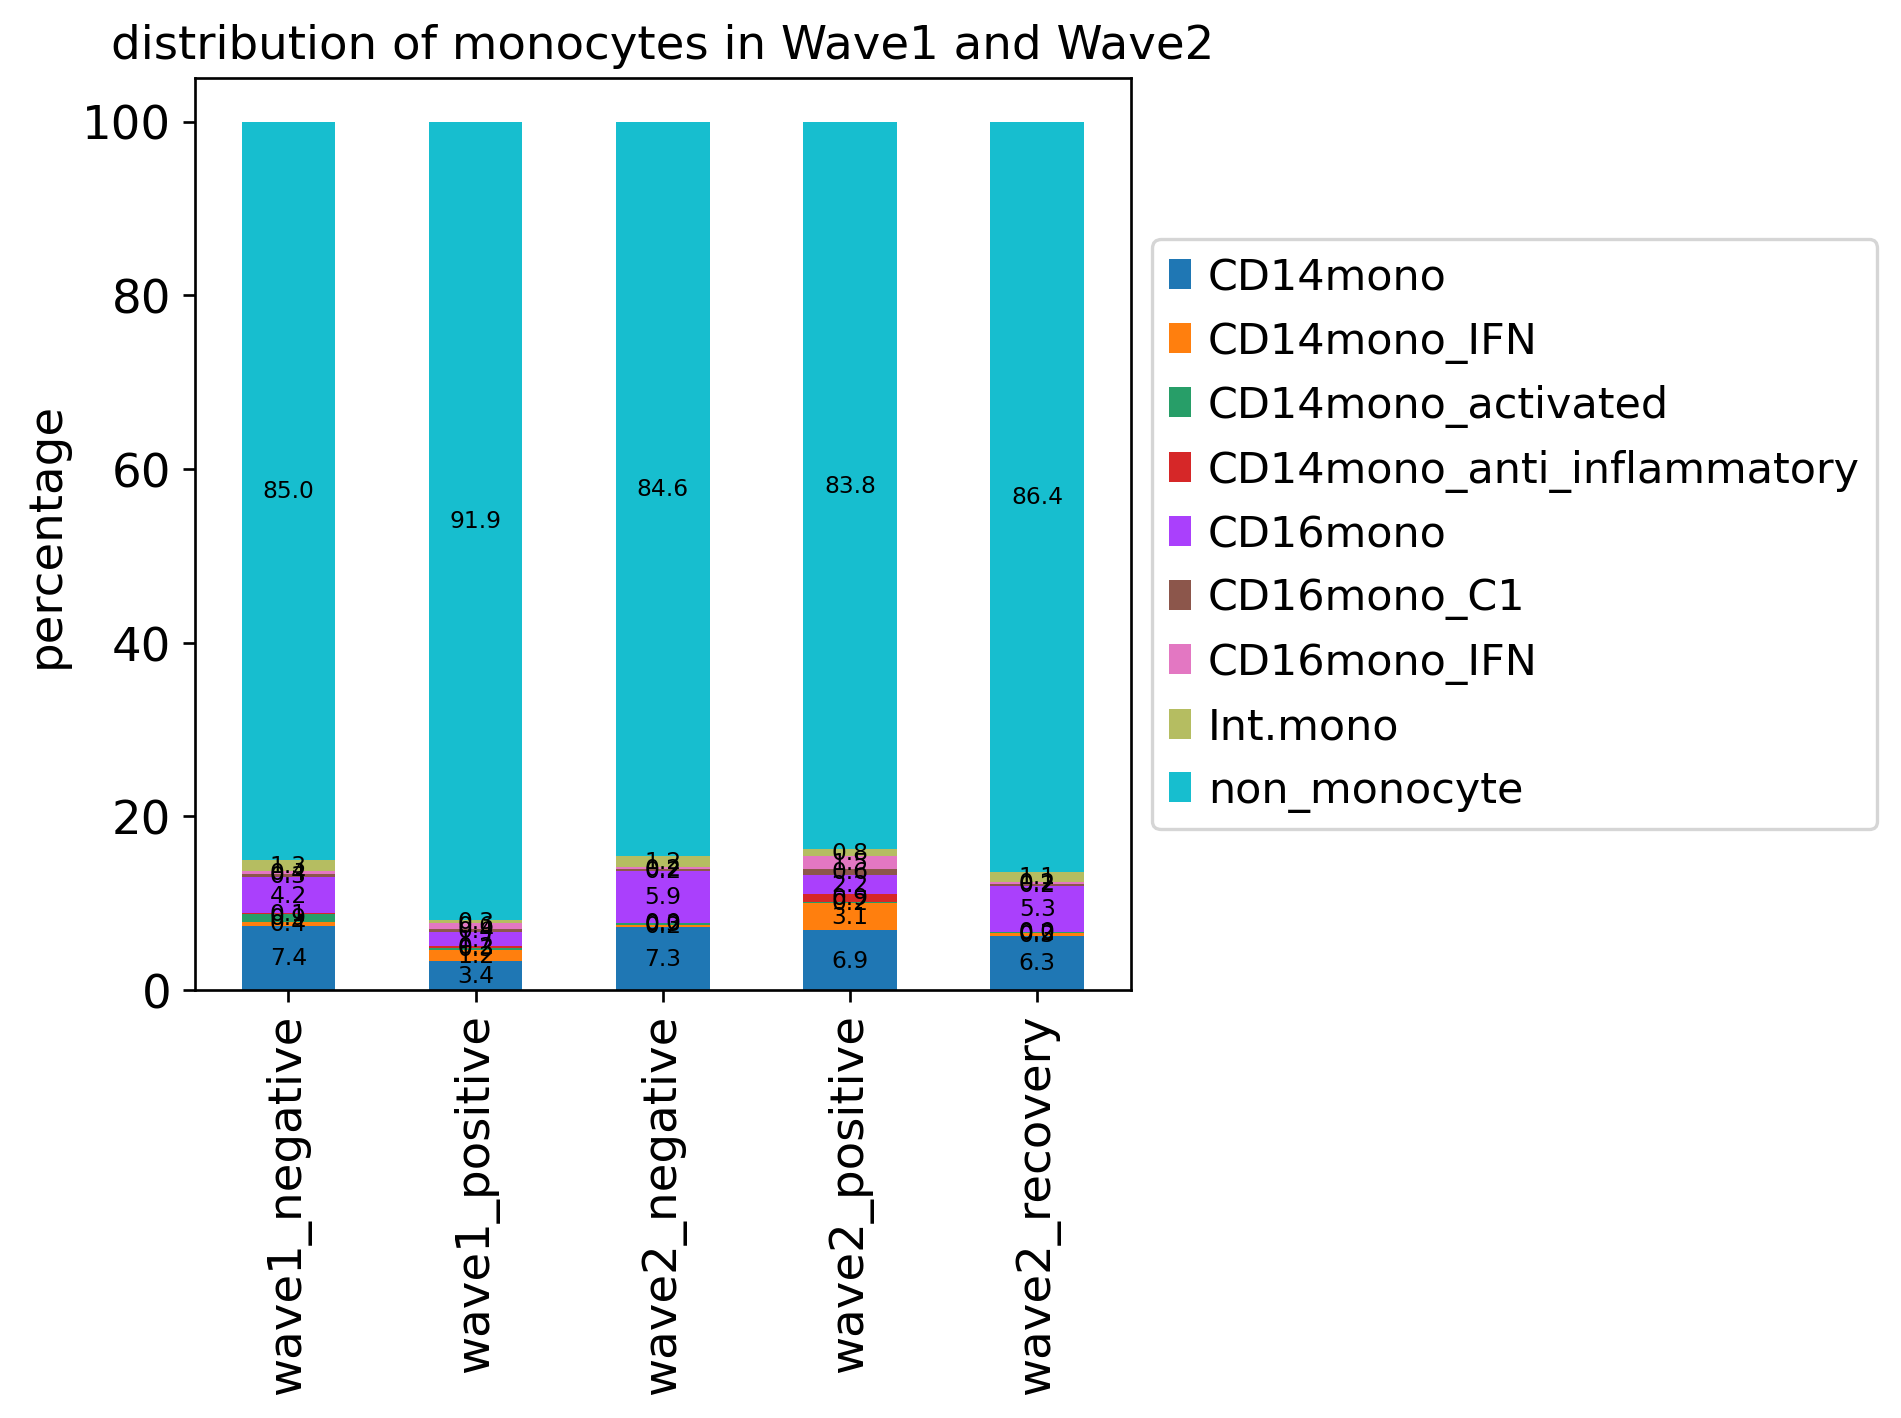

In [29]:
p2 = df_to_plot1.plot(x='wave_case_control', kind='bar', stacked=True,
        title='distribution of monocytes in Wave1 and Wave2',figsize=(5,5))
p2.set_ylabel('percentage')
p2.set_xlabel('')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  

In [30]:
df_to_plot1 =df_to_plot1[['CD14mono',
 'CD14mono_IFN',
 'CD14mono_activated',
 'CD14mono_anti_inflammatory',
 'CD16mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'Int.mono','wave_case_control']]

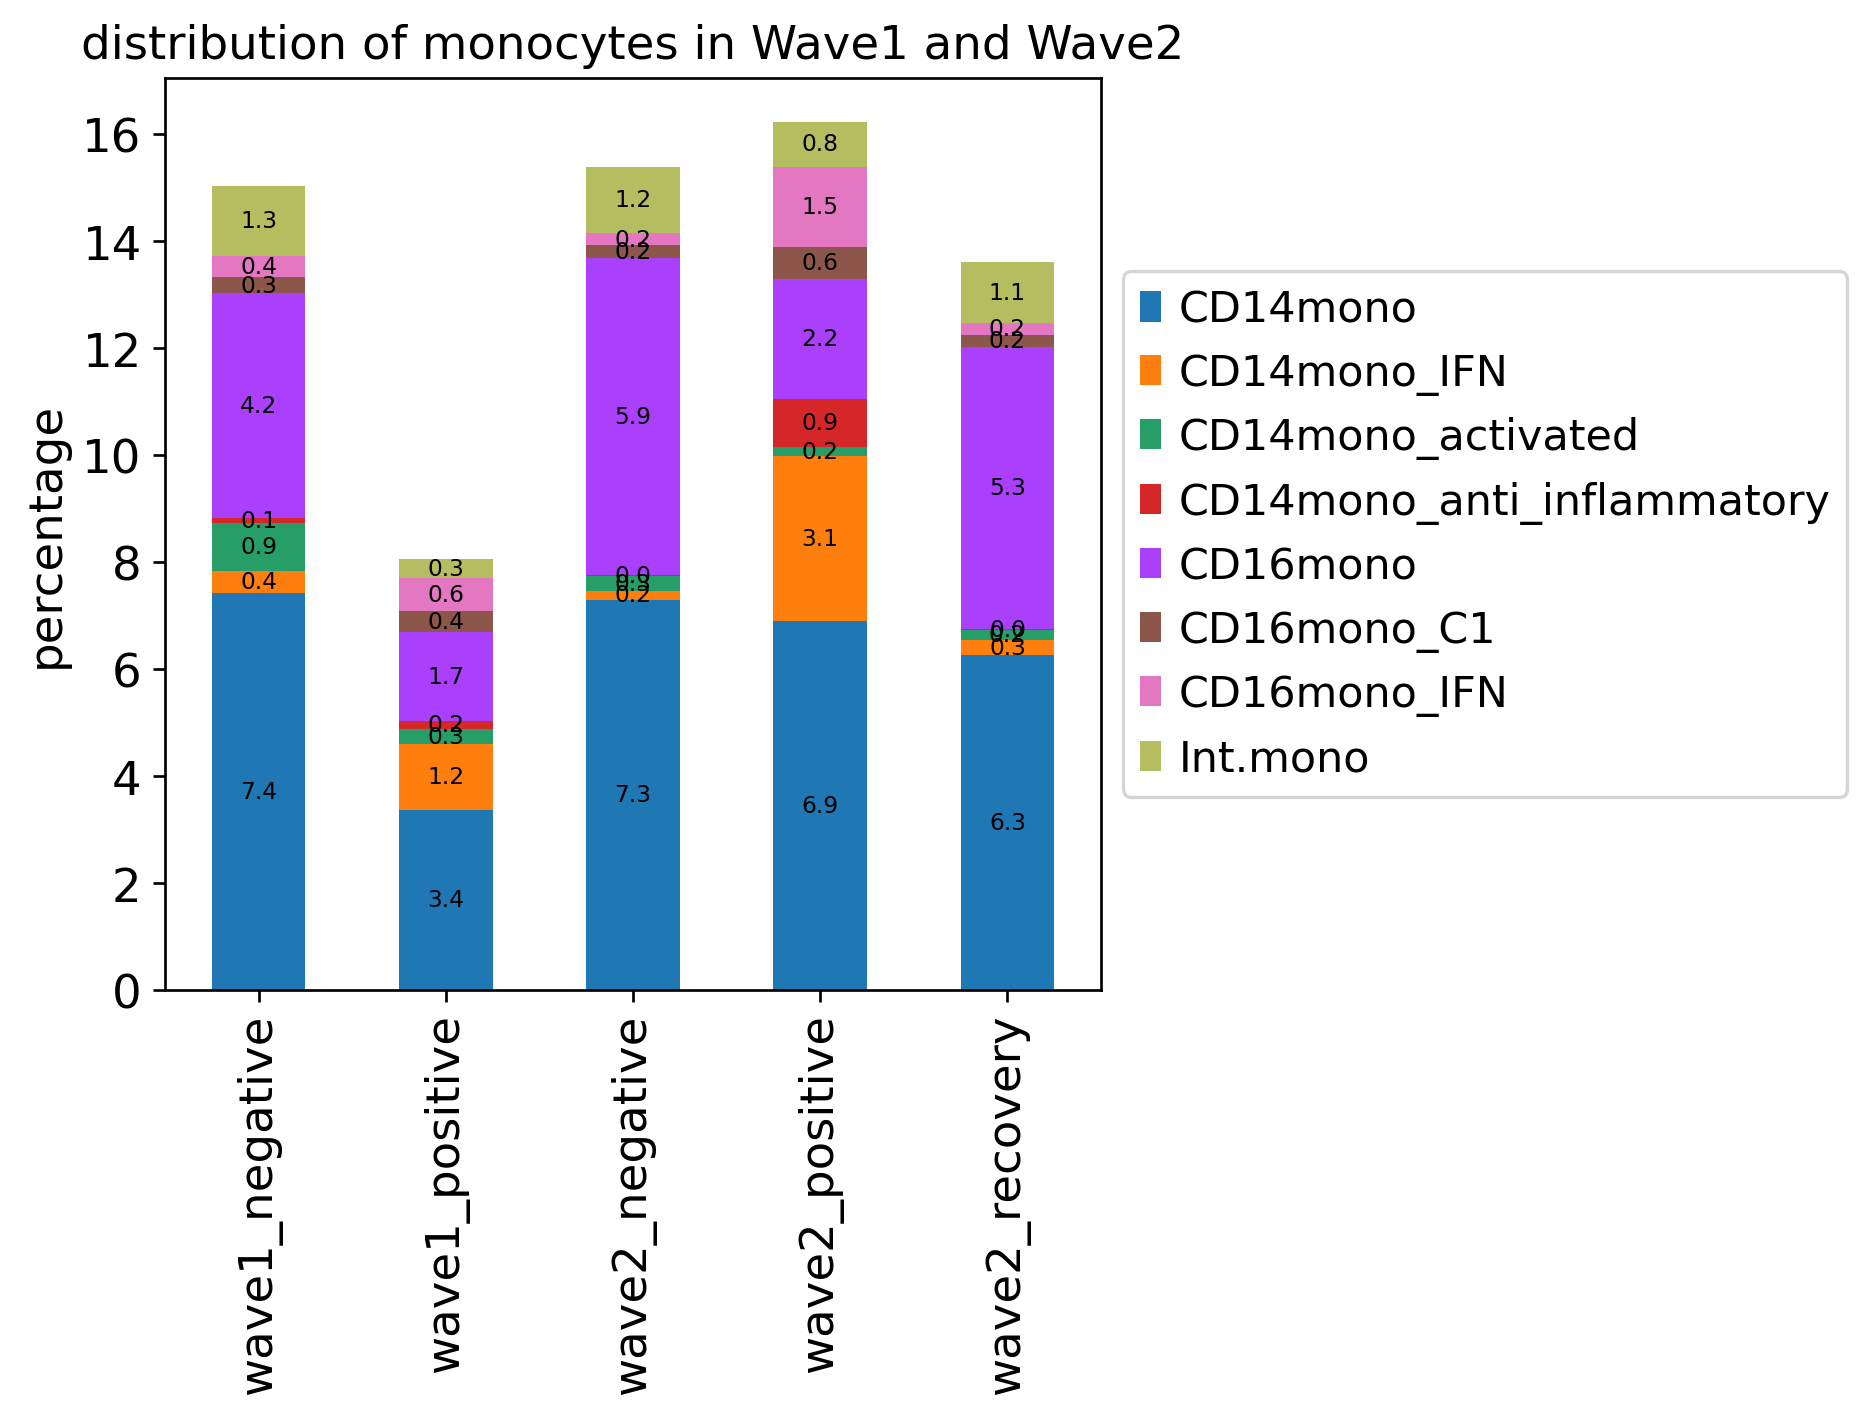

In [31]:
p2 = df_to_plot1.plot(x='wave_case_control', kind='bar', stacked=True,
        title='distribution of monocytes in Wave1 and Wave2',figsize=(5,5))
p2.set_ylabel('percentage')
p2.set_xlabel('')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  

In [32]:
# method 2

In [33]:
df_adata_gex

annot_to_plot,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,non_monocyte,wave_case_control
wave_case_control,,,,,,,,,,
wave1_negative,11735,656,1416,140,6638,461,621,2082,134207,wave1_negative
wave1_positive,9561,3474,786,458,4689,1104,1792,982,260683,wave1_positive
wave2_negative,2545,57,94,7,2065,84,79,433,29487,wave2_negative
wave2_positive,14547,6499,358,1888,4717,1272,3159,1775,176512,wave2_positive
wave2_recovery,2763,128,78,11,2328,95,102,503,38120,wave2_recovery


In [34]:
df_to_plot2 =df_adata_gex[['CD14mono',
 'CD14mono_IFN',
 'CD14mono_activated',
 'CD14mono_anti_inflammatory',
 'CD16mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'Int.mono']].div(df_adata_gex.non_monocyte, axis=0).multiply(100)

In [35]:
df_to_plot2

annot_to_plot,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
wave_case_control,,,,,,,,
wave1_negative,8.743955,0.488797,1.055087,0.104316,4.946091,0.343499,0.462718,1.551335
wave1_positive,3.667673,1.332653,0.301516,0.175692,1.798736,0.423503,0.687425,0.376703
wave2_negative,8.630922,0.193306,0.318785,0.023739,7.003086,0.284871,0.267915,1.468444
wave2_positive,8.241366,3.681903,0.202819,1.069616,2.672340,0.720631,1.789680,1.005597
wave2_recovery,7.248164,0.335782,0.204617,0.028856,6.107030,0.249213,0.267576,1.319517


In [36]:
df_to_plot2['wave_case_control'] = df_to_plot2.index # making index into column
df_to_plot2

annot_to_plot,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,wave_case_control
wave_case_control,,,,,,,,,
wave1_negative,8.743955,0.488797,1.055087,0.104316,4.946091,0.343499,0.462718,1.551335,wave1_negative
wave1_positive,3.667673,1.332653,0.301516,0.175692,1.798736,0.423503,0.687425,0.376703,wave1_positive
wave2_negative,8.630922,0.193306,0.318785,0.023739,7.003086,0.284871,0.267915,1.468444,wave2_negative
wave2_positive,8.241366,3.681903,0.202819,1.069616,2.672340,0.720631,1.789680,1.005597,wave2_positive
wave2_recovery,7.248164,0.335782,0.204617,0.028856,6.107030,0.249213,0.267576,1.319517,wave2_recovery


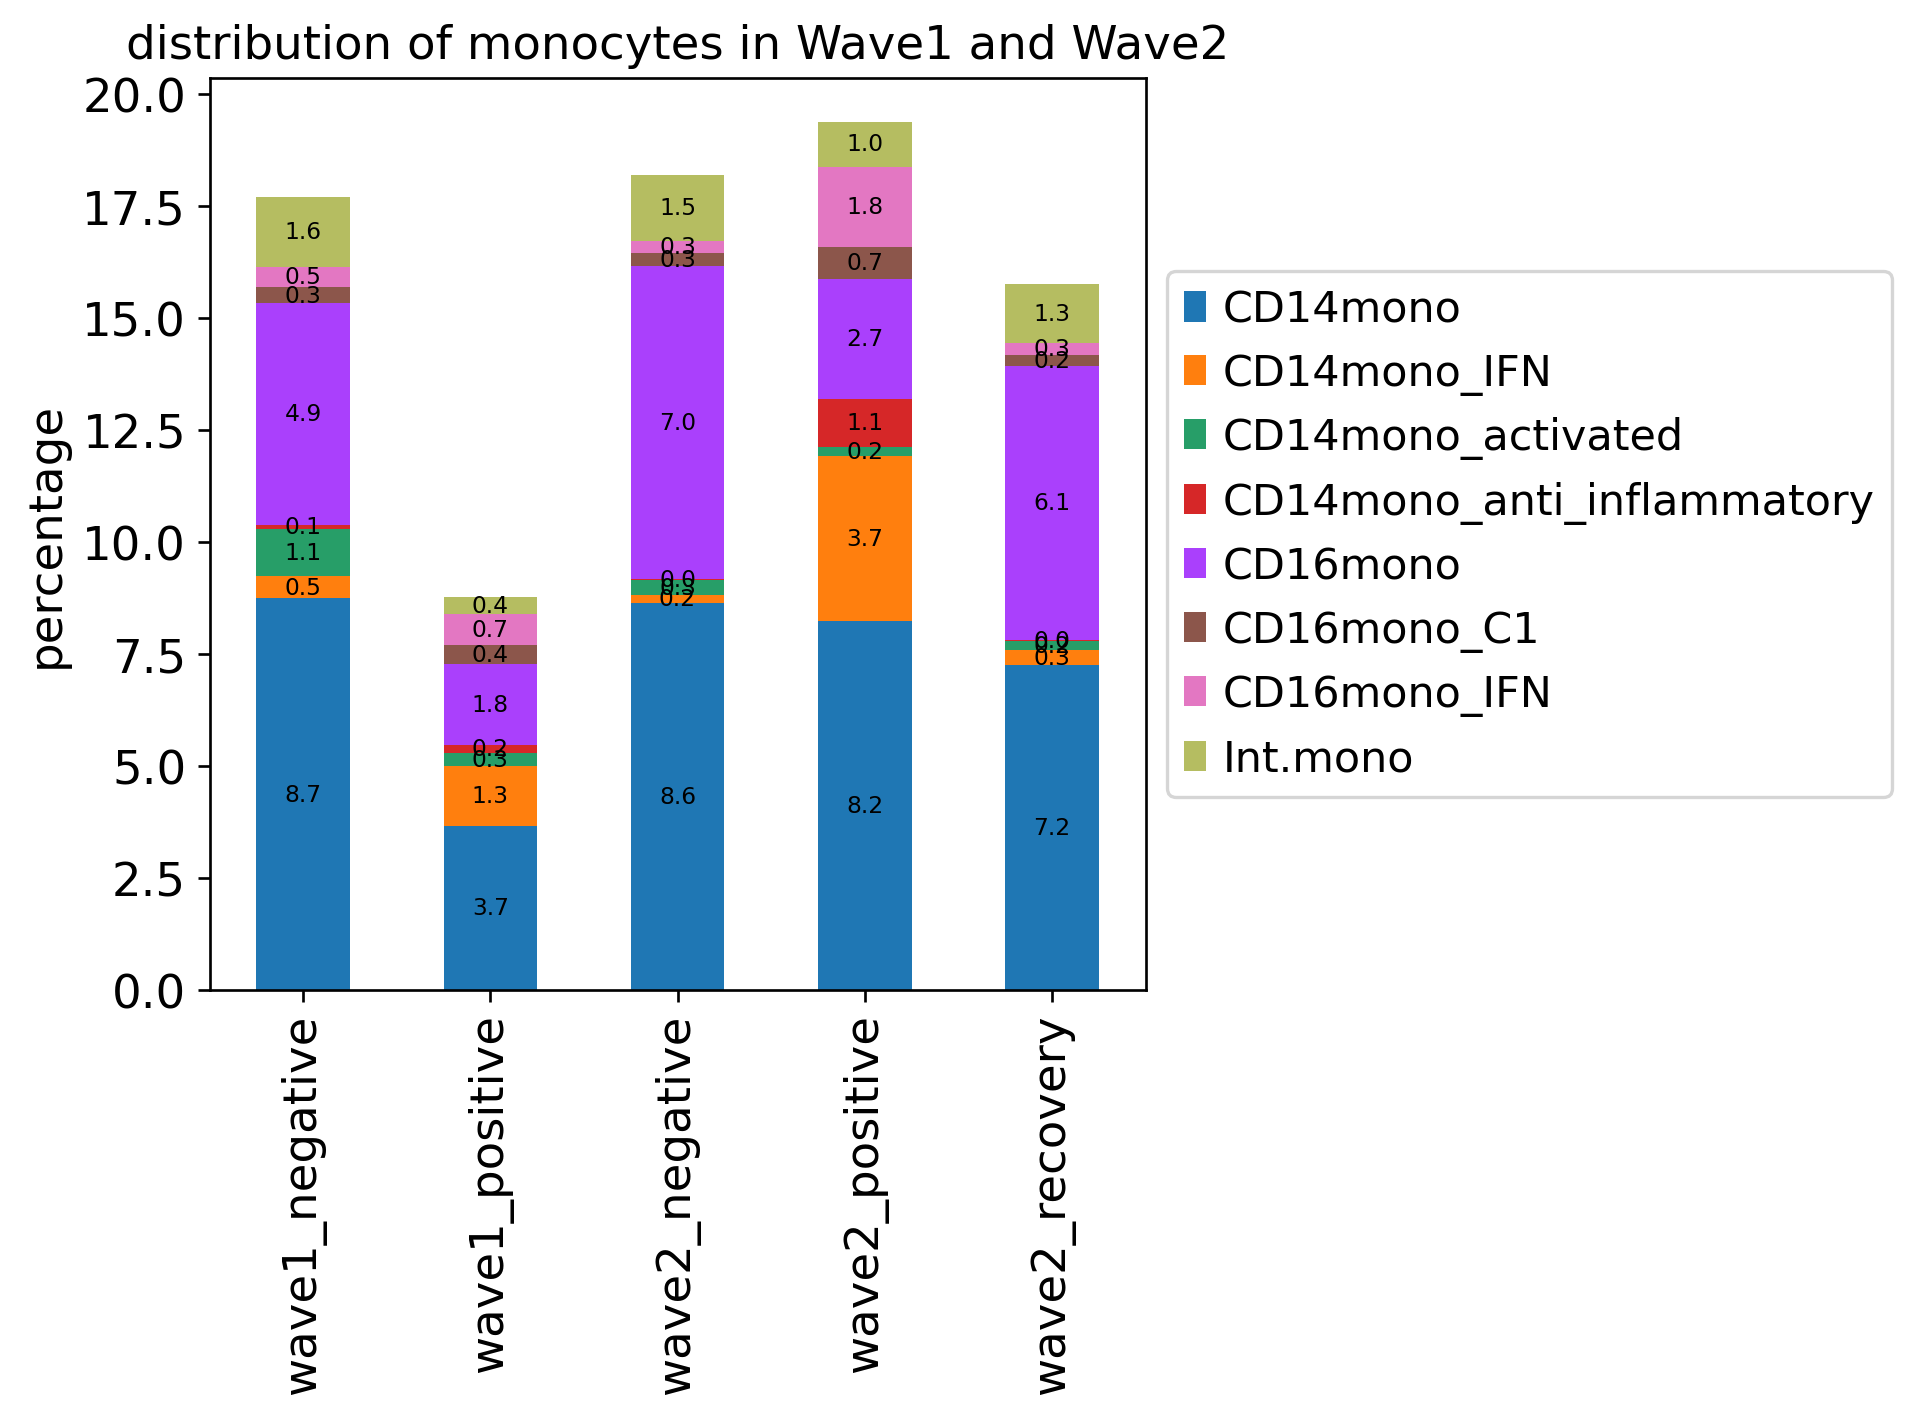

In [37]:
p2 = df_to_plot2.plot(x='wave_case_control', kind='bar', stacked=True,
        title='distribution of monocytes in Wave1 and Wave2',figsize=(5,5))
p2.set_ylabel('percentage')
p2.set_xlabel('')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  




#p2.text(-0.2,101,'23749',fontsize=9)
#p2.text(0.8,101,'22846',fontsize=9)
#p2.text(1.8,101,'5364',fontsize=9)
#p2.text(2.8,101,'34215',fontsize=9)
#p2.text(3.8,101,'6008',fontsize=9)

# Getting wave 2 only 

In [38]:
adata_gex_wave1 = adata_gex[adata_gex.obs['centre']=='NCL']
adata_gex_wave2 = adata_gex[adata_gex.obs['centre']=='Cambridge']

In [39]:
adata_gex_wave2.obs['case_control'].unique()

['POSITIVE', 'NEGATIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [40]:
adata_gex_wave2.obs['patient_id'].unique()

['C108', 'C137', 'C139', 'C58', 'C138', ..., 'C169', 'C170', 'C187', 'C190', 'C33']
Length: 17
Categories (17, object): ['C33', 'C58', 'C101', 'C108', ..., 'C169', 'C170', 'C187', 'C190']

In [41]:
# adding steroid status and case_control conditions

adata_gex_wave2.obs['steroid_status']='nan'

adata_gex_wave2.obs.loc[(adata_gex_wave2.obs["patient_id"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(adata_gex_wave2.obs['case_control']=='POSITIVE'), "steroid_status"] = 'steroid_positive'

adata_gex_wave2.obs.loc[(adata_gex_wave2.obs["patient_id"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(adata_gex_wave2.obs['case_control']=='NEGATIVE'), "steroid_status"] = 'steroid_negative'

adata_gex_wave2.obs.loc[(adata_gex_wave2.obs["patient_id"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(adata_gex_wave2.obs['case_control']=='RECOVERY'), "steroid_status"] = 'steroid_recovery'

#####################

adata_gex_wave2.obs.loc[(adata_gex_wave2.obs["patient_id"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(adata_gex_wave2.obs['case_control']=='POSITIVE'), "steroid_status"] = 'no_steroid_positive'

adata_gex_wave2.obs.loc[(adata_gex_wave2.obs["patient_id"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(adata_gex_wave2.obs['case_control']=='NEGATIVE'), "steroid_status"] = 'no_steroid_negative'


adata_gex_wave2.obs.loc[(adata_gex_wave2.obs["patient_id"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(adata_gex_wave2.obs['case_control']=='RECOVERY'), "steroid_status"] = 'no_steroid_recovery'



/tmp/ipykernel_152/3925422668.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_gex_wave2.obs['steroid_status']='nan'


In [42]:
list(adata_gex_wave2.obs['steroid_status'].unique())

['no_steroid_positive',
 'steroid_positive',
 'no_steroid_negative',
 'steroid_recovery',
 'no_steroid_recovery',
 'steroid_negative']

In [43]:
print (list(adata_gex_wave2.obs['sample_date'].unique()))

['22/01/2021', '28/01/2021', '09/02/2021', '16/04/2020', '04/02/2021', '06/01/2021', '30/01/2021', '06/02/2021', '09/03/2021', '02/02/2021', '15/01/2021', '11/03/2021', '23/01/2021', '25/02/2021', '22/04/2020', '20/01/2021', '30/04/2020', '26/01/2021', '19/01/2021', '27/01/2021', '04/03/2021', '12/01/2021', '07/01/2021', '14/01/2021', '16/01/2021', '29/01/2021', '10/02/2021', '12/05/2020', '10/03/2021', '03/02/2021', '11/01/2021', '18/01/2021', '08/02/2021', '01/02/2021', '05/02/2021', '25/01/2021', '26/05/2020', '13/01/2021']


In [44]:
# method1

In [45]:
df_to_plot1 = pd.crosstab(adata_gex_wave2.obs['steroid_status'],adata_gex_wave2.obs['annot_to_plot'])

In [46]:
#df.columns = df.columns.add_categories(['steroid_status'])
df_to_plot1['steroid_status'] = df_to_plot1.index # making index into column
df_to_plot1

annot_to_plot,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,non_monocyte,steroid_status
steroid_status,,,,,,,,,,
no_steroid_negative,1819,28,83,4,1695,51,68,359,18467,no_steroid_negative
no_steroid_positive,10300,2695,302,102,4318,584,1544,1568,95879,no_steroid_positive
no_steroid_recovery,2075,115,45,6,2154,87,99,452,28382,no_steroid_recovery
steroid_negative,726,29,11,3,370,33,11,74,11020,steroid_negative
steroid_positive,4247,3804,56,1786,399,688,1615,207,80633,steroid_positive
steroid_recovery,688,13,33,5,174,8,3,51,9738,steroid_recovery


In [47]:
cols = list(df_to_plot1.columns)
cols = cols[:-1]
df_to_plot1[cols] = df_to_plot1[cols].div(df_to_plot1[cols].sum(axis=1), axis=0).multiply(100)

In [48]:
df_to_plot1.sum(axis=1)

/tmp/ipykernel_152/943647444.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_to_plot1.sum(axis=1)


steroid_status
no_steroid_negative    100.0
no_steroid_positive    100.0
no_steroid_recovery    100.0
steroid_negative       100.0
steroid_positive       100.0
steroid_recovery       100.0
dtype: float64

In [49]:
df_to_plot1.obs['steroid_status'].value_counts()

AttributeError: 'DataFrame' object has no attribute 'obs'

In [ ]:
p2 = df_to_plot1.plot(x='steroid_status', kind='bar', stacked=True,
        title='distribution of monocytes in different steroid status',figsize=(5,5))
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  




In [ ]:
df_to_plot1 =df_to_plot1[['CD14mono',
 'CD14mono_IFN',
 'CD14mono_activated',
 'CD14mono_anti_inflammatory',
 'CD16mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'Int.mono','steroid_status']]

In [ ]:
p2 = df_to_plot1.plot(x='steroid_status', kind='bar', stacked=True,
        title='distribution of monocytes in different steroid status',figsize=(5,5))
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  



#method 2

In [ ]:
df_to_plot=pd.crosstab(adata_gex_wave2.obs['steroid_status'],adata_gex_wave2.obs['annot_to_plot'])

In [ ]:
df_to_plot

In [ ]:
df_to_plot2 =df_to_plot[['CD14mono',
 'CD14mono_IFN',
 'CD14mono_activated',
 'CD14mono_anti_inflammatory',
 'CD16mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'Int.mono']].div(df_to_plot.non_monocyte, axis=0).multiply(100)

In [ ]:
df_to_plot2

In [ ]:
df_to_plot2['steroid_status'] = df_to_plot2.index # making index into column
df_to_plot2

In [ ]:
p2 = df_to_plot2.plot(x='steroid_status', kind='bar', stacked=True,
        title='distribution of monocytes in Wave1 and Wave2',figsize=(5,5))
p2.set_ylabel('percentage')
p2.set_xlabel('')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  




#p2.text(-0.2,101,'23749',fontsize=9)
#p2.text(0.8,101,'22846',fontsize=9)
#p2.text(1.8,101,'5364',fontsize=9)
#p2.text(2.8,101,'34215',fontsize=9)
#p2.text(3.8,101,'6008',fontsize=9)

# steroid only

In [ ]:
# to get sub-samples who got steroid 
steroid = adata_gex_wave2[adata_gex_wave2.obs['patient_id'].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])]


no_steroid = adata_gex_wave2[adata_gex_wave2.obs['patient_id'].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190'])]


In [ ]:
(list(steroid.obs['case_control'].unique()))

In [ ]:
(list(steroid.obs['patient_id'].unique()))

In [ ]:
steroid.obs['discharge_date'].unique()

In [ ]:
#correction ##########
steroid.obs['discharge_date'] = steroid.obs['discharge_date'].astype('str')
steroid.obs.loc[steroid.obs["patient_id"] == "C65", "discharge_date"] = '10/06/2020'
steroid.obs['discharge_date'] = steroid.obs['discharge_date'].astype('category')

In [ ]:
tmp = steroid.copy()
tmp.obs['sample_date'] = tmp.obs['sample_date'].astype('object')
tmp.obs['date_first_symptoms'] = tmp.obs['date_first_symptoms'].astype('object')
tmp.obs['date_positive_swab'] = tmp.obs['date_positive_swab'].astype('object')



In [ ]:
tmp.obs['date_positive_swab'].unique()

In [ ]:
tmp.obs['date_first_symptoms'].replace({'NA':np.nan}, inplace = True)
tmp.obs['date_positive_swab'].replace({'NA':np.nan}, inplace = True)

In [ ]:
tmp.obs['date_first_symptoms'].unique()

In [ ]:
time_from_first_symptoms = pd.to_datetime(tmp.obs['sample_date'], format='%d/%m/%Y') - pd.to_datetime(tmp.obs['date_first_symptoms'], format='%d/%m/%Y')
time_from_positive_swab = pd.to_datetime(tmp.obs['sample_date'], format='%d/%m/%Y') - pd.to_datetime(tmp.obs['date_positive_swab'], format='%d/%m/%Y')

In [ ]:
time_from_positive_swab.unique()

In [ ]:
days_from_first_symptoms = time_from_first_symptoms.dt.days
days_from_positive_swab = time_from_positive_swab.dt.days

In [ ]:
days_from_positive_swab.unique()

In [ ]:
days_from_first_symptoms.fillna(0, inplace = True)
days_from_positive_swab.fillna(0, inplace = True)

In [ ]:
days_from_positive_swab.unique()

In [ ]:
max(days_from_first_symptoms)


In [ ]:
min(days_from_positive_swab)


In [ ]:
days_from_infection = [max(a,b) for a,b in zip(days_from_first_symptoms, days_from_positive_swab)]


In [ ]:
max(days_from_infection)


In [ ]:
steroid.obs['time_from_first_symptoms'] = days_from_first_symptoms
steroid.obs['time_from_positive_swab'] = days_from_positive_swab
steroid.obs['time_from_infection'] = days_from_infection

In [ ]:
steroid.obs['annot_to_plot'].unique()

In [ ]:
# adding dates of steroid inj for each patient
steroid.obs['steroid_date'] = 'nan'
steroid.obs.loc[steroid.obs["patient_id"] == "C146", "steroid_date"] = '22/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C139", "steroid_date"] = '07/02/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C147", "steroid_date"] = '17/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C145", "steroid_date"] = '05/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C138", "steroid_date"] = '28/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C33", "steroid_date"] = '20/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C101", "steroid_date"] = '07/01/2021'
steroid.obs.loc[steroid.obs["patient_id"] == "C141", "steroid_date"] = '02/02/2021'



In [ ]:
list(steroid.obs['steroid_date'].unique())

In [ ]:
tmp = steroid.copy()
tmp.obs['sample_date'] = tmp.obs['sample_date'].astype('object')
time_from_steroid = pd.to_datetime(tmp.obs['sample_date'], format='%d/%m/%Y') - pd.to_datetime(tmp.obs['steroid_date'], format='%d/%m/%Y')


In [ ]:
days_from_steroid = time_from_steroid.dt.days

In [ ]:
days_from_steroid.max()

In [ ]:
days_from_steroid.unique()

In [ ]:
steroid.obs['days_from_steroid'] = days_from_steroid

In [ ]:
steroid.obs['days_from_steroid'].unique()

In [ ]:
# adding metdata about before and after steroid samples based on date of steroid injection
steroid.obs['steroid_timeline']='nan'

steroid.obs.loc[(steroid.obs["days_from_steroid"]<=0)&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline"] = 'before_steroid_pos'
steroid.obs.loc[(steroid.obs["days_from_steroid"]<=0)&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline"] = 'before_steroid_neg'
steroid.obs.loc[(steroid.obs["days_from_steroid"]<=0)&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline"] = 'before_steroid_rec'

##########################

steroid.obs.loc[(steroid.obs["days_from_steroid"]>0)&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline"] = 'after_steroid_pos'
steroid.obs.loc[(steroid.obs["days_from_steroid"]>0)&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline"] = 'after_steroid_neg'

steroid.obs.loc[(steroid.obs["days_from_steroid"]>0)&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline"] = 'after_steroid_rec'

steroid.obs['steroid_timeline']=steroid.obs['steroid_timeline'].astype('category')




In [ ]:
steroid.obs['steroid_timeline'].unique()

In [ ]:
'''
# adding metdata about before and after steroid samples based on date of steroid injection
steroid.obs['steroid_timeline1']='nan'

steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_230121','C138_280121','C138_260121','C101_060121',
                                                                     'C141_020221','C141_200121','C141_300121','C141_220121',
                                                                      'C141_260121','C146_120121','C146_160121','C146_140121',
                                                                      'C146_190121','C147_140121','C33_140121','C33_190121','C33_160121']))&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline1"] = 'before_steroid_pos'
steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_230121','C138_280121','C138_260121','C101_060121',
                                                                     'C141_020221','C141_200121','C141_300121','C141_220121',
                                                                      'C141_260121','C146_120121','C146_160121','C146_140121',
                                                                      'C146_190121','C147_140121','C33_140121','C33_190121','C33_160121']))&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline1"] = 'before_steroid_neg'
steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_230121','C138_280121','C138_260121','C101_060121',
                                                                     'C141_020221','C141_200121','C141_300121','C141_220121',
                                                                      'C141_260121','C146_120121','C146_160121','C146_140121',
                                                                      'C146_190121','C147_140121','C33_140121','C33_190121','C33_160121']))&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline1"] = 'before_steroid_rec'

##########################

steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_040221','C138_020221','C138_300121','C138_300420',
                                                                    'C101_110121','C101_250221','C101_200121','C101_130121',
                                                                    'C101_180121','C141_090321','C145_230121','C145_190121',
                                                                    'C145_070121','C145_140121','C145_120121','C145_300420','C146_250221','C146_270121',
                                                                     'C146_230121','C146_300420','C147_280121','C147_260121','C147_190121','C147_230121','C147_300420',
                                                                     'C33_260121']))&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline1"] = 'after_steroid_pos'
steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_040221','C138_020221','C138_300121','C138_300420',
                                                                    'C101_110121','C101_250221','C101_200121','C101_130121',
                                                                    'C101_180121','C141_090321','C145_230121','C145_190121',
                                                                    'C145_070121','C145_140121','C145_120121','C145_300420','C146_250221','C146_270121',
                                                                     'C146_230121','C146_300420','C147_280121','C147_260121','C147_190121','C147_230121','C147_300420',
                                                                     'C33_260121']))&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline1"] = 'after_steroid_neg'

steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_040221','C138_020221','C138_300121','C138_300420',
                                                                    'C101_110121','C101_250221','C101_200121','C101_130121',
                                                                    'C101_180121','C141_090321','C145_230121','C145_190121',
                                                                    'C145_070121','C145_140121','C145_120121','C145_300420','C146_250221','C146_270121',
                                                                     'C146_230121','C146_300420','C147_280121','C147_260121','C147_190121','C147_230121','C147_300420',
                                                                     'C33_260121']))&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline1"] = 'after_steroid_rec'




'''

In [ ]:
#test = steroid[steroid.obs['steroid_timeline']=='after_steroid_neg']
#print(test.obs['case_control'].unique())

In [ ]:
#method1

In [ ]:
df_to_plot1 = pd.crosstab(steroid.obs['steroid_timeline'],steroid.obs['annot_to_plot'])
df_to_plot1

In [ ]:
#df.columns = df.columns.add_categories(['steroid_timeline'])
df_to_plot1['steroid_timeline'] = df_to_plot1.index # making index into column

In [ ]:
df_to_plot1

In [ ]:
df_to_plot1=df_to_plot1.reindex(['before_steroid_neg', "before_steroid_pos", "after_steroid_pos", "after_steroid_rec"])
df_to_plot1

In [ ]:
cols = list(df_to_plot1.columns)
cols = cols[:-1]
df_to_plot1[cols] = df_to_plot1[cols].div(df_to_plot1[cols].sum(axis=1), axis=0).multiply(100)

In [ ]:
steroid.obs['steroid_timeline'].value_counts()

In [ ]:
p2 = df_to_plot1.plot(x='steroid_timeline', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid',figsize=(5,5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 





In [ ]:
df_to_plot1.columns

In [ ]:
df_to_plot1 = df_to_plot1[['CD14mono', 'CD14mono_IFN', 'CD14mono_activated',
       'CD14mono_anti_inflammatory', 'CD16mono', 'CD16mono_C1', 'CD16mono_IFN',
       'Int.mono', 'steroid_timeline']]

In [ ]:
p2 = df_to_plot1.plot(x='steroid_timeline', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid',figsize=(5,5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 

In [ ]:
# method 2

In [ ]:
df_to_plot=pd.crosstab(steroid.obs['steroid_timeline'],steroid.obs['annot_to_plot'])

In [ ]:
df_to_plot

In [ ]:
df_to_plot2 =df_to_plot[['CD14mono',
 'CD14mono_IFN',
 'CD14mono_activated',
 'CD14mono_anti_inflammatory',
 'CD16mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'Int.mono']].div(df_to_plot.non_monocyte, axis=0).multiply(100)

In [ ]:
df_to_plot2

In [ ]:
df_to_plot2['steroid_timeline'] = df_to_plot2.index # making index into column
df_to_plot2

In [ ]:
df_to_plot2=df_to_plot2.reindex(['before_steroid_neg', "before_steroid_pos", "after_steroid_pos", "after_steroid_rec"])
df_to_plot2

In [ ]:
p2 = df_to_plot2.plot(x='steroid_timeline', kind='bar', stacked=True,
        title='distribution of monocytes in Wave1 and Wave2',figsize=(3,3))
p2.set_ylabel('percentage')
p2.set_xlabel('')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=5)  




#p2.text(-0.2,101,'23749',fontsize=9)
#p2.text(0.8,101,'22846',fontsize=9)
#p2.text(1.8,101,'5364',fontsize=9)
#p2.text(2.8,101,'34215',fontsize=9)
#p2.text(3.8,101,'6008',fontsize=9)

# adding metadata

In [ ]:
meta_obs=pd.read_csv('/home/jovyan/data/covid_19_renal/obs_myeloid.csv')

In [ ]:
mdata = sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_gex_myeloid_soupX_QC.h5ad',cache=True)

In [ ]:
mdata.obs['WHO_temp_severity'] = meta_obs['WHO_temp_severity'].values.astype("str") 
mdata.obs['WHO_temp_severity'] = mdata.obs['WHO_temp_severity'].astype('category')

In [ ]:
steroid.obs['WHO_temp_severity'] = steroid.obs['sex'].astype('object')

In [ ]:
steroid.obs['WHO_temp_severity'].update(pd.Series(mdata.obs['WHO_temp_severity'].astype('object')))

In [ ]:
steroid.obs['WHO_temp_severity'] = steroid.obs['WHO_temp_severity'].astype('category')

In [ ]:
steroid.obs['WHO_temp_severity'].unique()

#  steroid with positive case only -divided into 4 severity 

In [ ]:
steroid.obs['steroid_timeline'].unique()

In [ ]:
steroid_pos_only = steroid[steroid.obs['steroid_timeline'].isin(['before_steroid_pos','after_steroid_pos'])]

In [ ]:
steroid_pos_only.obs['WHO_temp_severity'].unique()

In [ ]:
# adding severity and steroid meta
steroid_pos_only.obs['steroid_severity']='nan'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity"] = 'before_steroid_pos_mild'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity"] = 'before_steroid_pos_moderate'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity"] = 'before_steroid_pos_severe'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity"] = 'before_steroid_pos_critical'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity"] = 'after_steroid_pos_mild'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity"] = 'after_steroid_pos_moderate'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity"] = 'after_steroid_pos_severe'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity"] = 'after_steroid_pos_critical'


In [ ]:
steroid_pos_only.obs['steroid_severity'].unique()

In [ ]:
#test = steroid_pos_only[steroid_pos_only.obs['steroid_severity']=='after_steroid_pos_severe']
#print(test.obs['case_control'].unique())
#print(test.obs['WHO_temp_severity'].unique())

In [ ]:
df = pd.crosstab(steroid_pos_only.obs['steroid_severity'],steroid_pos_only.obs['annot4'])
df

In [ ]:
df.columns = df.columns.add_categories(['steroid_severity'])
df['steroid_severity'] = df.index 
df

In [ ]:
df=df.reindex(["before_steroid_pos_mild", "after_steroid_pos_mild", "before_steroid_pos_moderate",'after_steroid_pos_moderate','before_steroid_pos_severe','after_steroid_pos_severe',
              'after_steroid_pos_critical'])
df

In [ ]:
p1=df.plot(x='steroid_severity', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity')
p1.set_ylabel('num of cells')
p1.set_xlabel('')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 

In [ ]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [ ]:
df

In [ ]:
steroid_pos_only.obs['steroid_severity'].value_counts()

In [ ]:
p2 = df.plot(x='steroid_severity', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity',figsize=(5,5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 



p2.text(-0.2,101,'2678',fontsize=9)
p2.text(0.8,101,'1811',fontsize=9)
p2.text(1.8,101,'1911',fontsize=9)
p2.text(2.8,101,'2146',fontsize=9)
p2.text(3.8,101,'290',fontsize=9)
p2.text(4.8,101,'1226',fontsize=9)
p2.text(5.8,101,'2740',fontsize=9)

In [ ]:
save_file = '/home/jovyan/scripts/renal_covid_19/steroid_pipeline_corrected/steroid_pos_only.h5ad'
steroid_pos_only.write_h5ad(save_file)

# two cat only 

In [ ]:
# adding severity and steroid meta
steroid_pos_only.obs['steroid_severity1']='nan'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity1"] = 'before_steroid_pos_mild/mod'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity1"] = 'before_steroid_pos_mild/mod'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity1"] = 'before_steroid_pos_sev/crit'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity1"] = 'before_steroid_pos_sev/crit'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity1"] = 'after_steroid_pos_mild/mod'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity1"] = 'after_steroid_pos_mild/mod'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity1"] = 'after_steroid_pos_sev/crit'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity1"] = 'after_steroid_pos_sev/crit'


In [ ]:
steroid_pos_only.obs['steroid_severity1'].unique()

In [ ]:
#test = steroid_pos_only[steroid_pos_only.obs['steroid_severity']=='after_steroid_pos_severe']
#print(test.obs['case_control'].unique())
#print(test.obs['WHO_temp_severity'].unique())

In [ ]:
df = pd.crosstab(steroid_pos_only.obs['steroid_severity1'],steroid_pos_only.obs['annot4'])
df

In [ ]:
df.columns = df.columns.add_categories(['steroid_severity1'])
df['steroid_severity1'] = df.index 
df

In [ ]:
df=df.reindex(["before_steroid_pos_mild/mod", "after_steroid_pos_mild/mod",'before_steroid_pos_sev/crit',
              'after_steroid_pos_sev/crit'])
df

In [ ]:
p1=df.plot(x='steroid_severity1', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity')
p1.set_ylabel('num of cells')
p1.set_xlabel('')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 

In [ ]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [ ]:
df

In [ ]:
steroid_pos_only.obs['steroid_severity1'].value_counts()

In [ ]:
p2 = df.plot(x='steroid_severity1', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity',figsize=(5,5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 



p2.text(-0.2,101,'2678',fontsize=9)
p2.text(0.8,101,'1811',fontsize=9)
p2.text(1.8,101,'1911',fontsize=9)
p2.text(2.8,101,'2146',fontsize=9)
p2.text(3.8,101,'290',fontsize=9)
p2.text(4.8,101,'1226',fontsize=9)
p2.text(5.8,101,'2740',fontsize=9)

In [ ]:
save_file = '/home/jovyan/scripts/renal_covid_19/steroid_pipeline_corrected/steroid_pipeline/steroid_pos_only.h5ad'
steroid_pos_only.write_h5ad(save_file)

# steroid_pos_rec only

In [ ]:
steroid.obs['steroid_timeline'].unique()

In [ ]:
steroid_pos_rec_only = steroid[steroid.obs['steroid_timeline'].isin(['before_steroid_pos','after_steroid_pos','after_steroid_rec'])]

In [ ]:
steroid_pos_rec_only.obs['steroid_timeline'].unique()

In [ ]:
steroid_pos_rec_only.obs['patient_id'].unique()

In [ ]:
steroid_pos_rec_paired_only = steroid_pos_rec_only[steroid_pos_rec_only.obs['patient_id']!='C145']

In [ ]:
steroid_pos_rec_paired_only.obs['patient_id'].unique()

In [ ]:
save_file = '/home/jovyan/scripts/renal_covid_19/steroid_pipeline_corrected/steroid_pipeline/steroid_pos_rec_only.h5ad'
steroid_pos_rec_only.write_h5ad(save_file)

In [ ]:
save_file = '/home/jovyan/scripts/renal_covid_19/steroid_pipeline_corrected/steroid_pipeline/steroid_pos_rec_paired_only.h5ad'
steroid_pos_rec_paired_only.write_h5ad(save_file)